# 2. Logistic regression

- Used as part of INFO8010 Deep Learning (Gilles Louppe, 2018-2019).
- Originally adapted from [Pytorch tutorial for Deep Learning researchers](https://github.com/yunjey/pytorch-tutorial) (Yunvey Choi, 2018).

---

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable

# Hyper-parameters

In [2]:
input_size = 784
num_classes = 10
num_epochs = 5
 #numb for each step gradient
learning_rate = 0.001 #gamma

# Data

In [31]:
# MNIST Dataset (Images and Labels)
batch_size = 100
train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

# Dataset Loader (Input Pipline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)


In [9]:
data_iter = iter(train_loader)
X, y = data_iter.next()

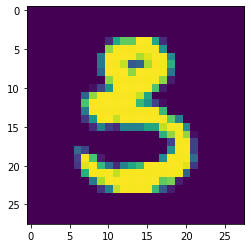

In [10]:
plt.imshow(X[0, 0])

# Model

In [14]:
# Model
class LogisticRegression(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LogisticRegression, self).__init__() ###наследование. прописали то, что уже было и добавляем свое
        self.linear = nn.Linear(input_size, num_classes) #linear layer. the par of father mod it contains all the info
        self.softmax = nn.Softmax() ##last layer defines probability of diffeerent classes. so, it normalizez the numbers
    
    def forward(self, x): #explain operations 
        out = self.linear(x) #apply lin layer
        out = self.softmax(out)
        return out

model = LogisticRegression(input_size, num_classes)

In [15]:
X.view(-1, 28*28).shape

torch.Size([100, 784])

In [16]:
model.forward(X.view(-1, 28*28))[0]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  # Remove the CWD from sys.path while we load stuff.


tensor([0.0955, 0.1057, 0.1139, 0.1178, 0.0907, 0.0738, 0.1194, 0.0963, 0.0943,
        0.0927], grad_fn=<SelectBackward>)

<div class="alert alert-success">
<b>EXERCISE</b>:

Print <code>y</code> and explain the data structure you see (type and content).

Is it consistent with what a neural network expects when dealing with a classification problem?
If not, why can we still train the model? 
</div>

In [13]:
# Your code
y

tensor([5, 6, 4, 4, 4, 8, 3, 0, 0, 0, 9, 0, 6, 6, 9, 7, 7, 2, 2, 5, 4, 2, 8, 4,
        4, 8, 1, 9, 3, 5, 7, 7, 4, 4, 3, 9, 6, 7, 2, 9, 3, 5, 7, 6, 1, 4, 0, 1,
        8, 0, 3, 3, 1, 0, 4, 2, 3, 7, 6, 6, 7, 0, 7, 3, 9, 7, 5, 7, 7, 7, 4, 9,
        9, 1, 4, 5, 1, 6, 0, 9, 8, 7, 6, 7, 9, 4, 2, 7, 8, 5, 0, 7, 8, 0, 0, 2,
        6, 8, 3, 9])

# Loss and optimizer

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  # Remove the CWD from sys.path while we load stuff.


Epoch: [1/5], Step: [600/600], Loss: 1.7101
Epoch: [2/5], Step: [600/600], Loss: 1.4993
Epoch: [3/5], Step: [600/600], Loss: 1.2345
Epoch: [4/5], Step: [600/600], Loss: 1.1452
Epoch: [5/5], Step: [600/600], Loss: 0.9752


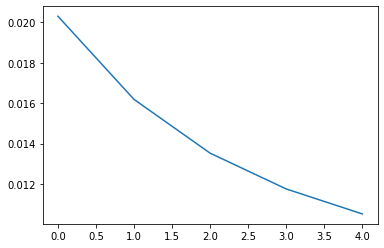

In [17]:
# Loss and Optimizer
# Softmax is internally computed.
# Set parameters to be updated.
criterion = nn.NLLLoss()  #log probability. needs normal-n
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  
losses = []
# Training the Model
#computing all the batch
for epoch in range(num_epochs):
    loss_tot = 0
    for i, (images, labels) in enumerate(train_loader):
        images = images.view(-1, 28*28) ##it's changing the resctructure of data. -1 "i want the last dim contain 784 and I let u comp the dim to do that"
        
        # Forward + Backward + Optimize
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs.log(), labels)
        loss.backward()  # <=> x.grad += dloss/dx for all parameters x
        loss_tot +=loss.detach().data
        
        optimizer.step()
    losses.append(loss_tot/len(train_dataset))
    print('Epoch: [%d/%d], Step: [%d/%d], Loss: %.4f' 
           % (epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, loss))
plt.plot(losses)

In [18]:
torch.optim?

(<matplotlib.image.AxesImage at 0x1d00323b940>, tensor(0))

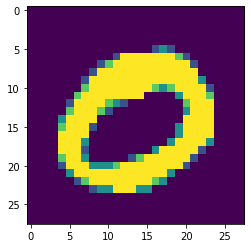

In [18]:
plt.imshow(X[8, 0]), y[8]

In [19]:
model(X[8].view(1, 784)) ###answer with probabilities

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  # Remove the CWD from sys.path while we load stuff.


tensor([[9.2682e-01, 8.1869e-04, 4.1962e-03, 1.1818e-02, 2.2008e-03, 2.7682e-02,
         4.5051e-03, 1.1601e-02, 6.7530e-03, 3.6037e-03]],
       grad_fn=<SoftmaxBackward>)

<div class="alert alert-success">
<b>EXERCISE</b>:

Update the code with the use of different optimizers and plot the resulting learning curves (check out matplotlib).
What do you observe in terms of convergence time?

</div>

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  # Remove the CWD from sys.path while we load stuff.


Epoch: [1/5], Step: [1/1], Loss: 2.3401
Epoch: [2/5], Step: [1/1], Loss: 2.2877
Epoch: [3/5], Step: [1/1], Loss: 2.2519
Epoch: [4/5], Step: [1/1], Loss: 2.2234
Epoch: [5/5], Step: [1/1], Loss: 2.1990


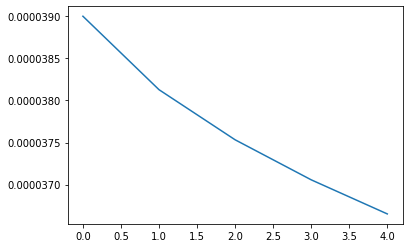

In [26]:
# Your code
model = LogisticRegression(input_size, num_classes)
optimizer = torch.optim.Adagrad(model.parameters(), lr=learning_rate)
criterion = nn.NLLLoss()  #log probability. needs normal-n
losses = []
# Training the Model
#computing all the batch
for epoch in range(num_epochs):
    loss_tot = 0
    for i, (images, labels) in enumerate(train_loader):
        images = images.view(-1, 28*28) ##it's changing the resctructure of data. -1 "i want the last dim contain 784 and I let u comp the dim to do that"
        
        # Forward + Backward + Optimize
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs.log(), labels)
        loss.backward()  # <=> x.grad += dloss/dx for all parameters x
        loss_tot+=loss.detach().data
        optimizer.step()
    losses.append(loss_tot/len(train_dataset))    
    print('Epoch: [%d/%d], Step: [%d/%d], Loss: %.4f' 
           % (epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, loss))
plt.plot(losses)

<div class="alert alert-success">
<b>EXERCISE</b>:

Update the code above to implement gradient descent instead of stochastic gradient descent and plot the two corresponding training curves.

</div>

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  # Remove the CWD from sys.path while we load stuff.


Epoch: [1/5], Step: [600/600], Loss: 2.3390
Epoch: [2/5], Step: [600/600], Loss: 2.3718
Epoch: [3/5], Step: [600/600], Loss: 2.3253
Epoch: [4/5], Step: [600/600], Loss: 2.3533
Epoch: [5/5], Step: [600/600], Loss: 2.3559


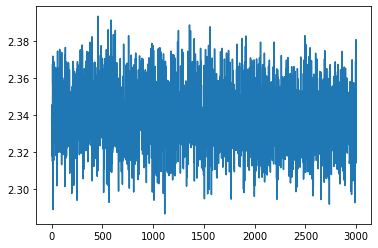

In [33]:
# Your code
model = LogisticRegression(input_size, num_classes)
criterion = nn.NLLLoss()  #log probability. needs normal-n
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  
losses = []
# Training the Model
#computing all the batch
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.view(-1, 28*28) ##it's changing the resctructure of data. -1 "i want the last dim contain 784 and I let u comp the dim to do that"
        
        # Forward + Backward + Optimize
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs.log(), labels)
        loss.backward()  # <=> x.grad += dloss/dx for all parameters x
        losses.append(loss.detach().data)
    optimizer.step()
        
    print('Epoch: [%d/%d], Step: [%d/%d], Loss: %.4f' 
           % (epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, loss))
plt.plot(losses)

<div class="alert alert-success">
<b>EXERCISE</b>:

Update the structure of the architecture and the training code so that it uses the torch.nn.CrossEntropyLoss()).

</div>

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  # Remove the CWD from sys.path while we load stuff.


Epoch: [1/5], Step: [600/600], Loss: 1.7574
Epoch: [2/5], Step: [600/600], Loss: 1.4329
Epoch: [3/5], Step: [600/600], Loss: 1.2885
Epoch: [4/5], Step: [600/600], Loss: 1.1874
Epoch: [5/5], Step: [600/600], Loss: 0.9590


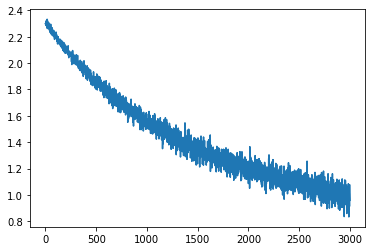

In [36]:
# Your code
model = LogisticRegression(input_size, num_classes)
criterion = nn.CrossEntropyLoss()  #log probability. needs normal-n
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  
losses = []
# Training the Model
#computing all the batch
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.view(-1, 28*28) ##it's changing the resctructure of data. -1 "i want the last dim contain 784 and I let u comp the dim to do that"
        
        # Forward + Backward + Optimize
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs.log(), labels)
        loss.backward()  # <=> x.grad += dloss/dx for all parameters x
        losses.append(loss.detach().data)
        optimizer.step()
        
    print('Epoch: [%d/%d], Step: [%d/%d], Loss: %.4f' 
           % (epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, loss))
plt.plot(losses)

# Test the model

<div class="alert alert-success">
<b>EXERCISE</b>:
<ul>
    <li> Explain what it means to enter in testing mode. </li>
    <li> Why can't we directly optimize with respect to the maximum operator at training time, since this is the final objective we want to achieve. </li>
</ul>
</div>

In [37]:
# Test the Model
correct = 0
total = 0
model.eval()

for images, labels in test_loader:
    images = images.view(-1, 28*28)
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
    
print('Accuracy of the model on the 10000 test images: %d %%' % (100 * correct / total))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  # Remove the CWD from sys.path while we load stuff.


Accuracy of the model on the 10000 test images: 82 %


<div class="alert alert-success">
<b>EXERCISE</b>:
    
Now monitor the behavior on both training and testing set at learning time.

</div>

In [ ]:
# Your code